## Building Neural Network for regression using california_housing Dataset

In [1]:
import numpy as np
import pandas.compat
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

### Description of Dataset

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(housing.data,housing.target,random_state=42) # 75% and 25% split 
x_train,x_valid,y_train,y_valid=train_test_split(X_train,Y_train,random_state=42)

In [7]:
X_train.shape

(15480, 8)

### Standarisation of Data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
x_train=scaler.fit_transform(x_train)## Scalar is trained on traing data set only and from the learned parameter we are scaling test and valid dataset 
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)



In [9]:
x_train[0]

array([-0.19397883, -1.07781319, -0.94338545,  0.01485314,  0.02073335,
       -0.57291624,  0.92926047, -1.42215523])

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

## Compiling and creating neural network model for Regression problems

In [11]:
model=keras.models.Sequential([
              keras.layers.Dense(30,activation="relu",input_shape=[8]),
              keras.layers.Dense(30,activation="relu"),
              keras.layers.Dense(1),

])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])
## mae===mean absolute error

In [14]:
model_history=model.fit(x_train,y_train,epochs=40,validation_data=(x_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/40
363/363 [==============================] - 1s 1ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/40
363/363 [==============================] - 1s 1ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [15]:
model_history.history

{'loss': [1.8866394758224487,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191371917725,
  0.5271905064582825,
  0.5032976269721985,
  0.48535558581352234,
  0.47091808915138245,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.3979603350162506,
  0.394916296005249,
  0.392380952835083,
  0.38980719447135925,
  0.387410044670105,
  0.38507524132728577,
  0.38291803002357483,
  0.3808581829071045,
  0.3787591755390167,
  0.3769364356994629,
  0.37497687339782715,
  0.3729954957962036,
  0.3713502585887909,
  0.37013334035873413,
  0.36850523948669434,
  0.3672060966491699,
  0.36596885323524475,
  0.36465781927108765,
  0.36356648802757263,
  0.3624041974544525,
  0.36129018664360046],
 'mae': [0.9900256991386414,
  0.6041510701179504,
  0.5618005990982056,
  0.5398454070091248,
  

<function matplotlib.pyplot.show>

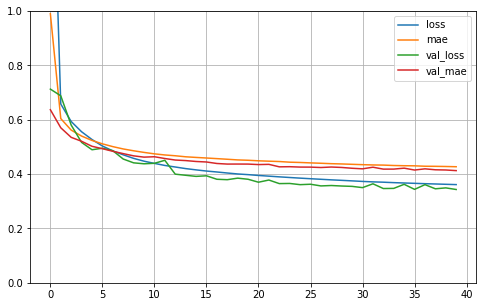

In [16]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

### Evaluating Performance and prediction of the Model


In [17]:
mae_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3601 - mae: 0.4246


In [18]:
x_new=x_test[:10]  # Taking first ten datasets for evaluation and prediction


In [19]:
# Calculating the probability of each class(10 classes)
y_proba=model.predict(x_new)
print(y_proba.round(2)) ## Predicted values
print(y_test[:10])  ## Actual values

[[0.59]
 [1.84]
 [3.77]
 [2.63]
 [2.81]
 [1.76]
 [2.55]
 [1.57]
 [2.77]
 [4.2 ]]
[0.477   0.458   5.00001 2.186   2.78    1.587   1.982   1.575   3.4
 4.466  ]


In [20]:
del model

In [21]:
keras.backend.clear_session()

### Functional API's
for complex neural architecture .Possible to create wide linkage

In [22]:
input_=keras.layers.Input(shape=x_train.shape[1:])# We are using layers as func to next layers 
hidden1=keras.layers.Dense(30,activation="relu")(input_)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_,hidden2])  # merging output of hidden layer2 and input layer
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [24]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])
## mae===mean absolute error

In [25]:
model_history=model.fit(x_train,y_train,epochs=80,validation_data=(x_valid,y_valid))

Epoch 1/80
363/363 [==============================] - 1s 2ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/80
363/363 [==============================] - 1s 2ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/80
363/363 [==============================] - 1s 2ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/80
363/363 [==============================] - 1s 1ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/80
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [26]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.626488208770752,
  0.5877465605735779,
  0.5565561056137085,
  0.5311980843544006,
  0.5107864141464233,
  0.4951668083667755,
  0.48022276163101196,
  0.4684668779373169,
  0.4589638411998749,
  0.45022058486938477,
  0.4432659149169922,
  0.43632543087005615,
  0.43062451481819153,
  0.4253448247909546,
  0.4212932586669922,
  0.4168177843093872,
  0.4126453101634979,
  0.40958571434020996,
  0.4059634804725647,
  0.40294399857521057,
  0.4000455439090729,
  0.3971884846687317,
  0.3946215510368347,
  0.3924905061721802,
  0.3904934525489807,
  0.3884531259536743,
  0.38671207427978516,
  0.38484570384025574,
  0.38295412063598633,
  0.38158518075942993,
  0.3805287778377533,
  0.37870270013809204,
  0.377562940120697,
  0.37630170583724976,
  0.37508344650268555,
  0.37408918142318726,
  0.37281879782676697,
  0.3716459572315216,
  0.37104251980781555,
  0.37028491497039795,
  0.36903753876686096,
  0.3680493235588074,
  0.3677

<function matplotlib.pyplot.show>

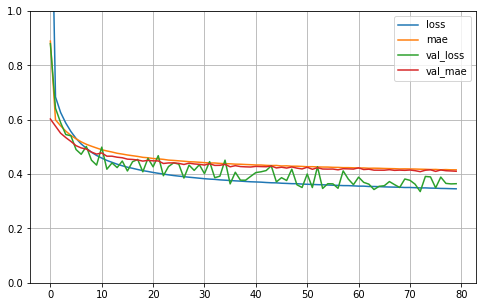

In [27]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

### Evaluating Performance and prediction of the Model


In [28]:
mae_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3453 - mae: 0.4147


In [29]:
x_new=x_test[:10]  # Taking first ten datasets for evaluation and prediction


In [30]:
# Calculating the probability of each class(10 classes)
y_proba=model.predict(x_new)
print(y_proba.round(2)) ## Predicted values
print(y_test[:10])  ## Actual values

[[0.72]
 [1.68]
 [4.17]
 [2.68]
 [2.96]
 [1.75]
 [2.46]
 [1.54]
 [2.76]
 [4.13]]
[0.477   0.458   5.00001 2.186   2.78    1.587   1.982   1.575   3.4
 4.466  ]


## Saving and Restoring

In [31]:
model.save("my_functional_model.h5")

In [32]:
%pwd   # %cd path --- if you want to change path of saved model

'/content'

In [33]:
del model

In [34]:
keras.backend.clear_session()

In [35]:
model=keras.models.load_model("my_functional_model.h5")

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [37]:
y_pred=model.predict(x_new)
print(y_pred)

[[0.71822155]
 [1.6817915 ]
 [4.1707244 ]
 [2.6761103 ]
 [2.959702  ]
 [1.7546465 ]
 [2.4577527 ]
 [1.538209  ]
 [2.7606604 ]
 [4.128527  ]]


In [38]:
del model

In [39]:
keras.backend.clear_session()

## Callbacks during training 
* can create checkpoints , save model after each epoch

In [40]:
model=keras.models.Sequential([
              keras.layers.Dense(30,activation="relu",input_shape=[8]),
              keras.layers.Dense(30,activation="relu"),
              keras.layers.Dense(1),

])

In [41]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])


In [42]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")  ## file will be saved as variable name  Model-1,Model-2 etc.

In [43]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb])
## Model could be saved at each epoch , Model will be saved in diff files

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.0148 - mae: 1.0404 - val_loss: 1.4007 - val_mae: 0.7047
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7735 - mae: 0.6609 - val_loss: 1.3632 - val_mae: 0.6278
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6815 - mae: 0.6089 - val_loss: 0.8402 - val_mae: 0.5747
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6134 - mae: 0.5725 - val_loss: 0.5897 - val_mae: 0.5467
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5652 - mae: 0.5466 - val_loss: 0.5373 - val_mae: 0.5229
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5242 - mae: 0.5261 - val_loss: 0.5175 - val_mae: 0.5015
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4955 - mae: 0.5096 - val_loss: 0.4717 - val_mae: 0.4857
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [44]:
del model 
keras.backend.clear_session()

In [45]:
model=keras.models.load_model("Model-10.h5")

In [46]:
mse_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4343 - mae: 0.4726


### Save Best Model only

In [47]:
model=keras.models.Sequential([
              keras.layers.Dense(30,activation="relu",input_shape=[8]),
              keras.layers.Dense(30,activation="relu"),
              keras.layers.Dense(1),

])

In [48]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])


In [49]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

In [50]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb])


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.5112 - mae: 0.8941 - val_loss: 0.8699 - val_mae: 0.6246
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6710 - mae: 0.6074 - val_loss: 0.6277 - val_mae: 0.5795
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6166 - mae: 0.5782 - val_loss: 0.5812 - val_mae: 0.5533
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5772 - mae: 0.5582 - val_loss: 0.5454 - val_mae: 0.5374
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5462 - mae: 0.5401 - val_loss: 0.5101 - val_mae: 0.5172
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5188 - mae: 0.5261 - val_loss: 0.4870 - val_mae: 0.5035
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4975 - mae: 0.5131 - val_loss: 0.4705 - val_mae: 0.4924
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [51]:
model=keras.models.load_model("Best_Model.h5")

In [52]:
m_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4456 - mae: 0.4788


In [53]:
del model 
keras.backend.clear_session()

### Early Stopping :- No of epochs after which their is no improvement after which training will be stopped

In [54]:
model=keras.models.Sequential([
              keras.layers.Dense(30,activation="relu",input_shape=[8]),
              keras.layers.Dense(30,activation="relu"),
              keras.layers.Dense(1),

])

In [55]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])


In [56]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Early_Stopping.h5",save_best_only=True)

In [63]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [64]:
history=model.fit(x_train,y_train,epochs=40,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4235 - mae: 0.4658 - val_loss: 0.4061 - val_mae: 0.4503
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4153 - mae: 0.4599 - val_loss: 0.4209 - val_mae: 0.4522
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4089 - mae: 0.4565 - val_loss: 0.4081 - val_mae: 0.4437
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4034 - mae: 0.4528 - val_loss: 0.4042 - val_mae: 0.4448
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3994 - mae: 0.4499 - val_loss: 0.3843 - val_mae: 0.4391
Epoch 6/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3953 - mae: 0.4476 - val_loss: 0.4106 - val_mae: 0.4389
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3924 - mae: 0.4454 - val_loss: 0.3823 - val_mae: 0.4350
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [59]:
model=keras.models.load_model("Early_Stopping.h5")

In [60]:
m_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4190 - mae: 0.4624


In [61]:
x_new=x_test[:10]  # Taking first ten datasets for evaluation and prediction


In [62]:
# Calculating the probability of each class(10 classes)
y_proba=model.predict(x_new)
print(y_proba.round(2)) ## Predicted values
print(y_test[:10])  ## Actual values

[[0.63]
 [1.67]
 [3.44]
 [2.42]
 [2.6 ]
 [1.89]
 [2.62]
 [1.61]
 [2.78]
 [4.12]]
[0.477   0.458   5.00001 2.186   2.78    1.587   1.982   1.575   3.4
 4.466  ]
